In [61]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as rms
from sklearn.metrics import roc_auc_score
from math import exp
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [60]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [13]:
!pip install -U scikit-learn scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.4.1.post1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.12.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.8.3-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.3.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.49.0-cp312-cp312-win_amd64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.2.0-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
Using cached scikit_learn-1.4.1.post1-cp312-cp312-win_amd64.whl (10.6 MB)
Using cached scipy-1.12.0-cp312-cp312-win_amd64.whl (45.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [14]:
data = pd.read_excel('D:\МИРЭА\Машинное обучение\Пр1\diabetes.xlsx')
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Антоша\AppData\Local\Temp\ipykernel_1572\3249471030.py:1: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_excel('D:\МИРЭА\Машинное обучение\Пр1\diabetes.xlsx')


,Беременность,Глюкоза,АД,Толщина КС,Инсулин,ИМТ,Наследственность,Возраст,Диагноз
0,6,148,72,35.0,0.0,33.6,0.627,50,1
1,1,85,66,29.0,0.0,26.6,0.351,31,0
2,8,183,64,0.0,0.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [15]:
y = data.Диагноз.values
x_data = data.drop(["Диагноз"],axis=1)

In [16]:
x_data.head()

,Беременность,Глюкоза,АД,Толщина КС,Инсулин,ИМТ,Наследственность,Возраст
0,6,148,72,35.0,0.0,33.6,0.627,50
1,1,85,66,29.0,0.0,26.6,0.351,31
2,8,183,64,0.0,0.0,23.3,0.672,32
3,1,89,66,23.0,94.0,28.1,0.167,21
4,0,137,40,35.0,168.0,43.1,2.288,33


In [17]:
from sklearn.preprocessing import StandardScaler
col_names = x_data.columns
scaler = StandardScaler()
scaler.fit(x_data)
x = pd.DataFrame(scaler.transform(x_data), columns=col_names)
x.head()

,Беременность,Глюкоза,АД,Толщина КС,Инсулин,ИМТ,Наследственность,Возраст
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.508137,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.360097,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.649697,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.938920,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.733274,-0.020496


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [20]:
x_train.shape

(537, 8)

In [21]:
x_test.shape

(231, 8)

In [22]:
x_train = x_train.T
x_test = x_test.T
y_train= y_train.T
y_test = y_test.T

In [23]:
x_train.shape

(8, 537)

In [34]:
def initialize_weights_bias(dimension):
    
    weights = np.full((dimension,1),0.01)
    bias = 0.0
    return weights,bias


In [35]:
def sigmoid_fun(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [43]:
def forward_backward_propagation(w,b,x_train,y_head):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid_fun(z)
    loss = -y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients


In [44]:
def parameter_training(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    for i in range(number_of_iterarion):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [50]:
def predict(w,b,x_test):
    z = sigmoid_fun(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

In [51]:
def log_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    dimension =  x_train.shape[0]
    w,b = initialize_weights_bias(dimension)
    parameters, gradients, cost_list = parameter_training(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 0.685123
Cost after iteration 10: 0.593770
Cost after iteration 20: 0.548602
Cost after iteration 30: 0.522893
Cost after iteration 40: 0.506671
Cost after iteration 50: 0.495682
Cost after iteration 60: 0.487859
Cost after iteration 70: 0.482087
Cost after iteration 80: 0.477713
Cost after iteration 90: 0.474329
Cost after iteration 100: 0.471669
Cost after iteration 110: 0.469549
Cost after iteration 120: 0.467842
Cost after iteration 130: 0.466454
Cost after iteration 140: 0.465317
Cost after iteration 150: 0.464379
Cost after iteration 160: 0.463601
Cost after iteration 170: 0.462951
Cost after iteration 180: 0.462407
Cost after iteration 190: 0.461949


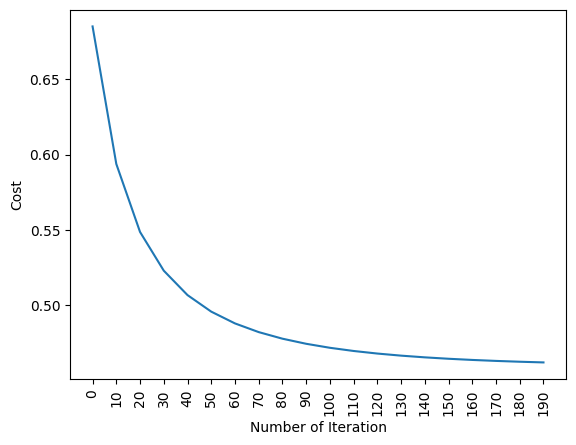

test accuracy: 72.72727272727273 %


In [52]:
log_regression(x_train, y_train, x_test, y_test,learning_rate = 0.1, num_iterations = 200)

In [53]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 200)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.7316017316017316 
train accuracy: 0.7802607076350093 


In [54]:
new_data = data.copy()
cols_num = ['Беременность', 'Глюкоза', 'АД', 'Толщина КС', 'Инсулин', 'ИМТ', 'Наследственность', 'Возраст', 'Диагноз']
correlation = new_data.corr().loc[cols_num, cols_num]
print(correlation)

                  Беременность   Глюкоза        АД  Толщина КС   Инсулин  \
Беременность          1.000000  0.129459  0.141282   -0.081672 -0.073535   
Глюкоза               0.129459  1.000000  0.152590    0.057328  0.331357   
АД                    0.141282  0.152590  1.000000    0.207371  0.088933   
Толщина КС           -0.081672  0.057328  0.207371    1.000000  0.436783   
Инсулин              -0.073535  0.331357  0.088933    0.436783  1.000000   
ИМТ                   0.017683  0.221071  0.281805    0.392573  0.197859   
Наследственность     -0.021708  0.131824  0.042096    0.159045  0.185336   
Возраст               0.544341  0.263514  0.239528   -0.113970 -0.042163   
Диагноз               0.221898  0.466581  0.065068    0.074752  0.130548   

                       ИМТ  Наследственность   Возраст   Диагноз  
Беременность      0.017683         -0.021708  0.544341  0.221898  
Глюкоза           0.221071          0.131824  0.263514  0.466581  
АД                0.281805          0.

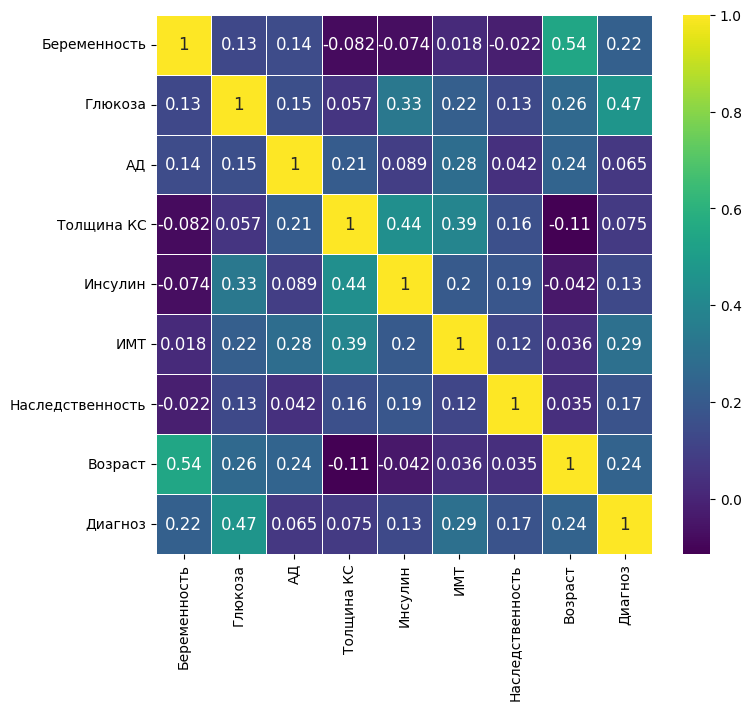

In [65]:
fig , ax = plt.subplots(figsize = (8,7))
sns.heatmap(correlation,
 linewidths=0.5, annot=True,cmap='viridis',
 linecolor="white", annot_kws = {'size':12})
plt.show()

In [259]:
data_new_correct = new_data.copy()
y = data_new_correct.Диагноз.values
x_data = data_new_correct.drop(["Диагноз", "Толщина КС", "Беременность"],axis=1)

In [260]:
x_data.head()

,Глюкоза,АД,Инсулин,ИМТ,Наследственность,Возраст
0,148,72,0.0,33.6,0.627,50
1,85,66,0.0,26.6,0.351,31
2,183,64,0.0,23.3,0.672,32
3,89,66,94.0,28.1,0.167,21
4,137,40,168.0,43.1,2.288,33


In [261]:
from sklearn.preprocessing import StandardScaler
col_names = x_data.columns
scaler = StandardScaler()
scaler.fit(x_data)
x = pd.DataFrame(scaler.transform(x_data), columns=col_names)
x.head()

,Глюкоза,АД,Инсулин,ИМТ,Наследственность,Возраст
0,0.848324,0.149641,-0.692891,0.204013,0.508137,1.425995
1,-1.123396,-0.160546,-0.692891,-0.684422,-0.360097,-0.190672
2,1.943724,-0.263941,-0.692891,-1.103255,0.649697,-0.105584
3,-0.998208,-0.160546,0.123302,-0.494043,-0.938920,-1.041549
4,0.504055,-1.504687,0.765836,1.409746,5.733274,-0.020496


In [262]:
from sklearn.model_selection import train_test_split

In [263]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [264]:
x_test.shape

(231, 6)

In [265]:
x_train.shape

(537, 6)

In [266]:
x_train = x_train.T
x_test = x_test.T
y_train= y_train.T
y_test = y_test.T

In [267]:
x_train.shape

(6, 537)

Cost after iteration 0: 0.686296
Cost after iteration 10: 0.598296
Cost after iteration 20: 0.552786
Cost after iteration 30: 0.526391
Cost after iteration 40: 0.509659
Cost after iteration 50: 0.498346
Cost after iteration 60: 0.490328
Cost after iteration 70: 0.484439
Cost after iteration 80: 0.479994
Cost after iteration 90: 0.476567
Cost after iteration 100: 0.473877
Cost after iteration 110: 0.471737
Cost after iteration 120: 0.470013
Cost after iteration 130: 0.468612
Cost after iteration 140: 0.467464
Cost after iteration 150: 0.466516
Cost after iteration 160: 0.465728
Cost after iteration 170: 0.465070
Cost after iteration 180: 0.464518
Cost after iteration 190: 0.464053


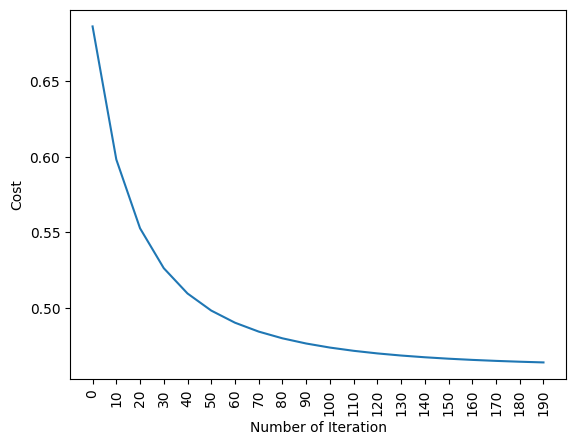

test accuracy: 74.02597402597402 %


In [268]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.1, num_iterations = 200)

In [269]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 200)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.7402597402597403 
train accuracy: 0.7877094972067039 
